<a href="https://colab.research.google.com/github/gaeun120312/Deeplearning/blob/main/14_%EB%AA%A8%EB%8D%B8%EC%84%B1%EB%8A%A5%ED%96%A5%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 불러오기
import pandas as pd

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

X = df.iloc[:, 0:12]  # 와인 속성
y = df.iloc[:, 12]    # 와인 분류
X.shape, y.shape

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (21/21), 460.95 KiB | 12.80 MiB/s, done.
Resolving deltas: 100% (3/3), done.


((6497, 12), (6497,))

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 실습 - 와인데이터
# 학습 데이터와 테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)

score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 1s 65ms/step - loss: 4.1401 - accuracy: 0.2430 - val_loss: 2.6966 - val_accuracy: 0.2431
Epoch 2/50
8/8 [=

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"

# 모델 저장
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25,
                    verbose=0, callbacks=[checkpointer])

score = model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])


Epoch 1: saving model to ./data/model/all/01-0.9608.hdf5

Epoch 2: saving model to ./data/model/all/02-0.9654.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to ./data/model/all/03-0.9623.hdf5

Epoch 4: saving model to ./data/model/all/04-0.9638.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9638.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9592.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9638.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9615.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9654.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9654.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9646.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9654.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9669.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9669.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9677.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9677.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9638.hdf5

Epoch 18: saving model to ./data/model/all/18-0.9677.hdf5

Epoch 19: saving model to ./data/model/all/19-0.9708.hdf5

Epo

In [8]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

hist_df = pd.DataFrame(history.history)
hist_df

Epoch 1/2000
8/8 [==============================] - 0s 28ms/step - loss: 0.0956 - accuracy: 0.9718 - val_loss: 0.0756 - val_accuracy: 0.9785
Epoch 2/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0962 - accuracy: 0.9718 - val_loss: 0.0863 - val_accuracy: 0.9762
Epoch 3/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0961 - accuracy: 0.9707 - val_loss: 0.0756 - val_accuracy: 0.9777
Epoch 4/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0971 - accuracy: 0.9710 - val_loss: 0.0754 - val_accuracy: 0.9754
Epoch 5/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0965 - accuracy: 0.9718 - val_loss: 0.0744 - val_accuracy: 0.9792
Epoch 6/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.0933 - accuracy: 0.9720 - val_loss: 0.0802 - val_accuracy: 0.9762
Epoch 7/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0924 - accuracy: 0.9738 - val_loss: 0.0741 - val_accuracy: 0.9769
Epoch 8/2000


,loss,accuracy,val_loss,val_accuracy
0,0.095552,0.971773,0.075556,0.978462
1,0.096189,0.971773,0.086338,0.976154
2,0.096116,0.970747,0.075569,0.977692
3,0.097066,0.971003,0.075361,0.975385
4,0.096479,0.971773,0.074401,0.979231
...,...,...,...,...
1995,0.016640,0.996151,0.032296,0.992308
1996,0.015848,0.996408,0.025917,0.993077
1997,0.016051,0.996151,0.027324,0.993846
1998,0.014787,0.996921,0.031147,0.993077


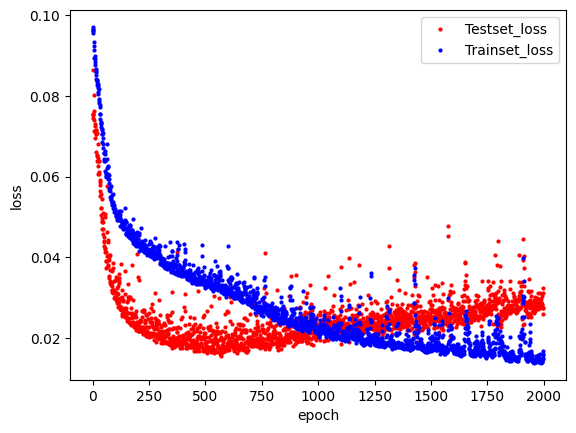

In [13]:
import numpy as np
import matplotlib.pyplot as plt

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
from tensorflow.callbacks import EearlyStopping

early_stopping_callback = EearlyStopping(monitor='val_loss', patience=20)
modelpath = "./data/model/Ch14-4-bestmodel.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)



ModuleNotFoundError: No module named 'tensorflow.callbacks'